In [ ]:
#Avsnitt 1 – Förberedelser och dataimportering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Läs in data
data_path = "data/health_study_dataset.csv"
df = pd.read_csv(data_path)

# Grundläggande städning
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['bmi'] = df['weight'] / (df['height'] / 100)**2

df.head()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease,bmi
0,1,57,F,168.9,65.8,141.8,4.58,No,0,23.065698
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0,29.467653
2,3,59,F,169.9,82.2,151.7,6.16,No,0,28.476398
3,4,72,M,157.7,93.1,151.0,6.63,No,0,37.435729
4,5,46,M,192.6,104.1,144.1,5.21,No,0,28.063263


**Förklaring:**  
Här importeras alla bibliotek och datasetet läses in. Kolumner för kön och rökstatus konverteras till kategorier och BMI beräknas, vilket breddar analysmöjligheterna.


In [ ]:
#Avsnitt 2 – Funktioner
def descriptive_stats(df, cols):
    """
    Returnerar mean, median, min och max för valda kolumner.
    """
    return pd.DataFrame({
        "mean": df[cols].mean(),
        "median": df[cols].median(),
        "min": df[cols].min(),
        "max": df[cols].max()
    })


**Förklaring:**  
Den här funktionen extraherar beskrivande statistik för valda variabler. Den gör koden mer modulär och återanvändbar.


In [36]:
#Avsnitt 3 - Test av funktioner
cols = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']
descriptive_stats(df, cols)


,mean,median,min,max
age,49.426250,50.00,18.0,90.00
weight,73.413000,73.20,33.7,114.40
height,171.849250,171.35,144.4,200.40
systolic_bp,149.178625,149.40,106.8,185.90
cholesterol,4.929150,4.97,2.5,7.88


Förklaring:  
Här testar jag den fristående funktionen descriptive_stats för att se att den fungerar som tänkt. Den returnerar medelvärde, median, min och max för de valda kolumnerna. Det är ett första steg för att kontrollera att min kod är korrekt innan jag bygger in den i klassen.

In [73]:
#Avsnitt 4 – Klassdefinition
class HealthAnalyzer:
    """
    Klass som utför flera hälsorelaterade analyser:
    - Beskrivande statistik
    - Enkel och multipel regression
    - PCA
    - Visualiseringar
    """

    def __init__(self, df):
        self.df = df.copy()

    def descriptive_stats(self, cols):
        """
        Returnerar mean, median, min och max för valda kolumner.
        """
        return pd.DataFrame({
            "mean": self.df[cols].mean(),
            "median": self.df[cols].median(),
            "min": self.df[cols].min(),
            "max": self.df[cols].max()
        })

    def regression_bp_age(self):
        """Enkel regression: blodtryck ~ ålder"""
        X = self.df[['age']]
        y = self.df['systolic_bp']
        model = LinearRegression().fit(X, y)
        results = {
        "Intercept": model.intercept_,
        "Koef (age)": model.coef_[0],
        "R^2": model.score(X, y)
    }
        return pd.DataFrame([results])

    def regression_bp_age_weight(self):
        """Multipel regression: blodtryck ~ ålder + vikt"""
        X = self.df[['age','weight']]
        y = self.df['systolic_bp']
        model = LinearRegression().fit(X, y)
        results = {
        "Intercept": model.intercept_,
        "Koef (age)": model.coef_,
        "R^2": model.score(X, y)
    }
        return pd.DataFrame([results])


    def pca_numeric(self, n_components=2):
        """PCA på numeriska variabler."""
        cols = ['age', 'height', 'weight', 'systolic_bp', 'cholesterol', 'bmi']
        X = self.df[cols].dropna()
        X_scaled = StandardScaler().fit_transform(X)
        pca = PCA(n_components=n_components).fit(X_scaled)
        return pca

    def plot_bp_vs_age(self):
        """Scatterplot: blodtryck vs ålder."""
        sns.regplot(data=self.df, x='age', y='systolic_bp', line_kws={'color':'red'})
        plt.title("Blodtryck vs ålder")
        plt.show()

    def plot_bmi_vs_cholesterol(self):
        """Scatterplot: BMI vs kolesterol per kön."""
        sns.scatterplot(data=self.df, x='bmi', y='cholesterol', hue='sex')
        plt.title("BMI vs kolesterolnivåer")
        plt.show()

    def plot_correlation_heatmap(self):
        """Korrelationer mellan numeriska variabler."""
        cols = ['age','height','weight','bmi','systolic_bp','cholesterol']
        corr = self.df[cols].corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title("Korrelationsmatris")
        plt.show()

    def plot_bp_by_sex(self):
        """Stapeldiagram: medelblodtryck per kön."""
        avg_bp = self.df.groupby('sex')['systolic_bp'].mean().reset_index()
        sns.barplot(data=avg_bp, x='sex', y='systolic_bp', palette='pastel')
        plt.title("Genomsnittligt systoliskt blodtryck per kön")
        plt.ylabel("Systoliskt blodtryck (mmHg)")
        plt.xlabel("Kön")
        plt.show()



Förklaring:  
Jag byggde en klass som samlar alla analyser på ett ställe. Det gör koden mer organiserad och lättare att använda igen. Klassen kan göra regressioner, PCA och olika visualiseringar. Jag tycker upplägget ger en bra balans – regressionerna visar samband, PCA lyfter fram mönster och graferna gör resultaten mer lättförståeliga.

In [74]:
#Avsnitt 5 – Användning av klassen
analyzer = HealthAnalyzer(df)

# Beskrivande statistik
analyzer.descriptive_stats(['age','weight','height','systolic_bp','cholesterol'])


,mean,median,min,max
age,49.426250,50.00,18.0,90.00
weight,73.413000,73.20,33.7,114.40
height,171.849250,171.35,144.4,200.40
systolic_bp,149.178625,149.40,106.8,185.90
cholesterol,4.929150,4.97,2.5,7.88


Förklaring:  
Här använder jag samma funktion, men nu via min klass HealthAnalyzer. Det visar att funktionen är integrerad i klassen och kan anropas på ett mer organiserat sätt. På så sätt blir koden mer strukturerad och lättare att återanvända i större analyser.

In [ ]:
# Enkel regression blodtryck ~ ålder
analyzer.regression_bp_age()



,Intercept,Koef (age),R^2
0,122.68489,0.536026,0.369152


In [79]:
# Multipel regression blodtryck ~ ålder + vikt
analyzer.regression_bp_age_weight()


,Intercept,Koef (age),R^2
0,109.499081,"[0.5389276325169825, 0.17765752193267906]",0.405256


Regressioner:  
Enkel regression visar att ålder har en positiv effekt på blodtrycket (R² ≈ 0.37). När jag lade till vikt i modellen ökade förklaringsgraden något (R² ≈ 0.41), vilket tyder på att både ålder och vikt tillsammans ger en bättre modell.

In [71]:
# PCA
pca = analyzer.pca_numeric()
pca.explained_variance_ratio_


array([0.37449166, 0.26930727])

PC1 ≈ 0.37 → första komponenten förklarar ca 37 % av variationen.

PC2 ≈ 0.27 → andra komponenten förklarar ca 27 %.

Tillsammans förklarar de två första komponenterna ungefär 64 % av variationen i datasetet.Det gör att jag kan reducera datan till två dimensioner och ändå behålla det mesta av informationen.

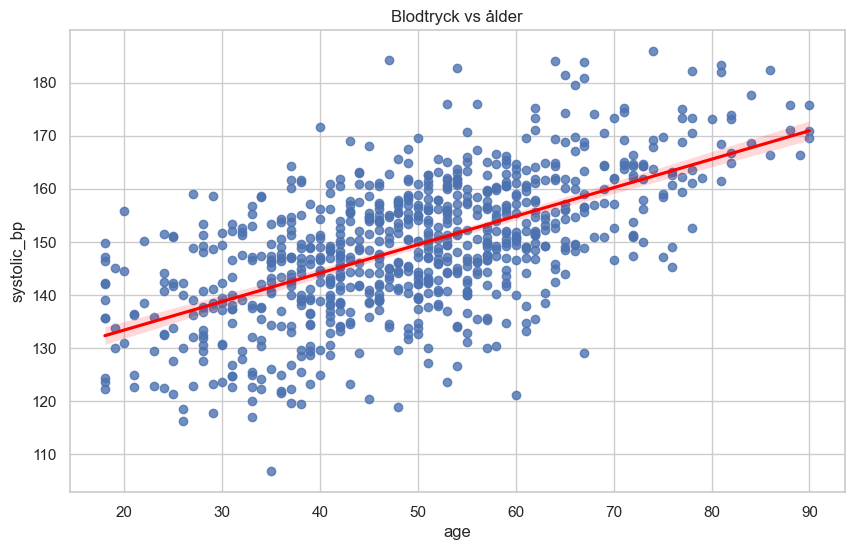

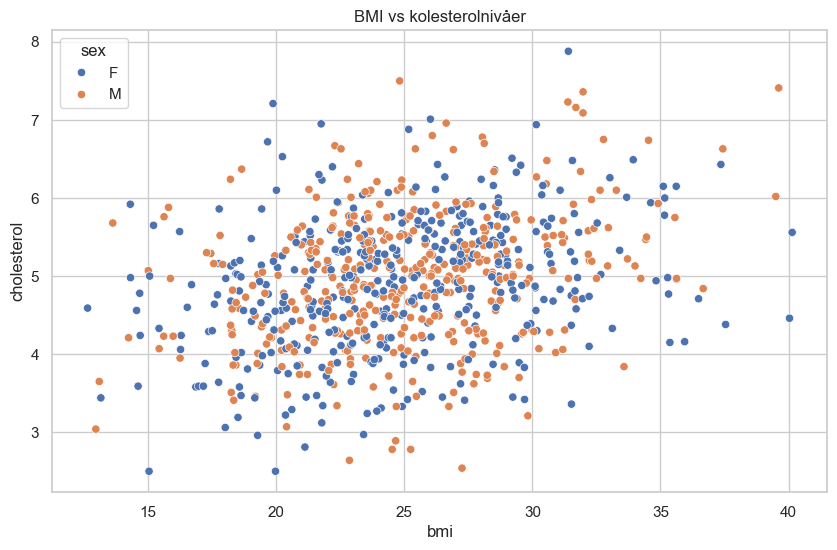

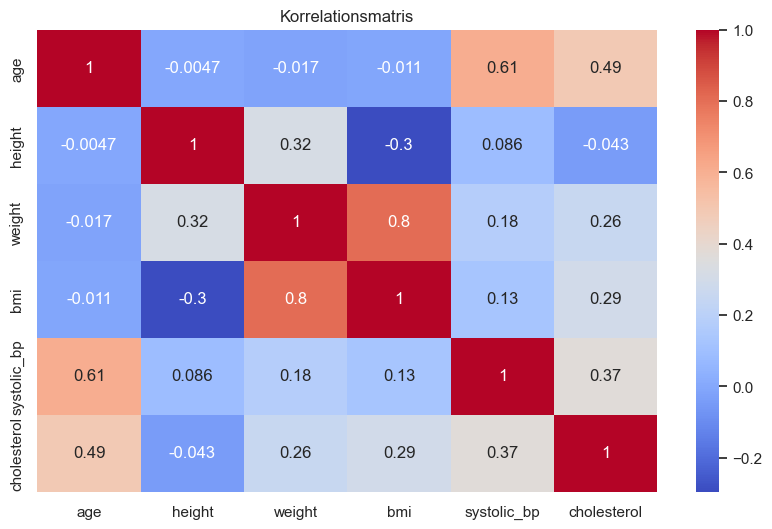

C:\Users\Marcie\AppData\Local\Temp\ipykernel_6944\3703646302.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bp = self.df.groupby('sex')['systolic_bp'].mean().reset_index()
C:\Users\Marcie\AppData\Local\Temp\ipykernel_6944\3703646302.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_bp, x='sex', y='systolic_bp', palette='pastel')


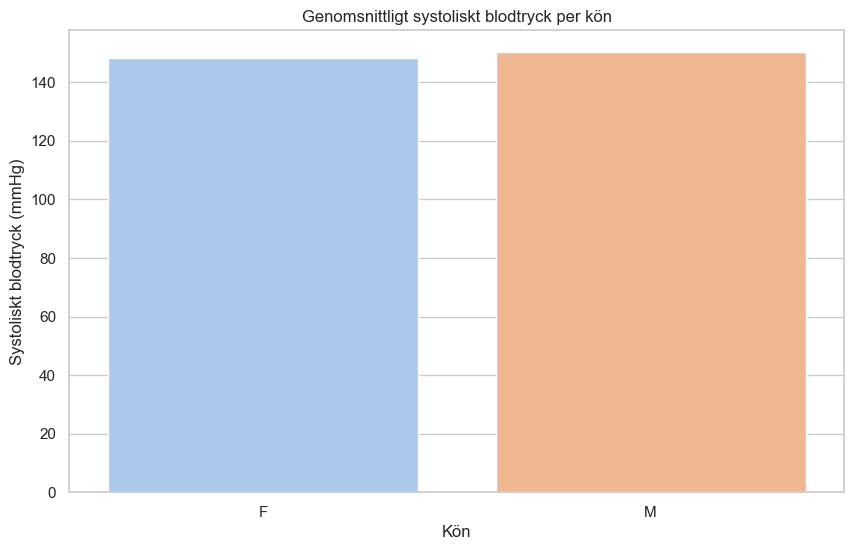

In [72]:
# Visualiseringar
analyzer.plot_bp_vs_age()
analyzer.plot_bmi_vs_cholesterol()
analyzer.plot_correlation_heatmap()
analyzer.plot_bp_by_sex()




***Sammanfattning***:  

Analysen visar att både ålder och vikt påverkar blodtrycket, vilket bekräftar en logisk koppling mellan dessa faktorer. PCA‑resultaten visar att två komponenter räcker för att fånga en stor del av variationen, vilket gör datan enklare att tolka utan att förlora viktig information. Visualiseringarna förstärker resultaten: BMI hänger ihop med kolesterol, vikt och BMI är starkt korrelerade, och stapeldiagrammet visar att män och kvinnor har nästan samma medelblodtryck. Tillsammans ger dessa metoder en tydlig helhetsbild av hur olika variabler samspelar och påverkar hälsan.

***Metodval***:

Jag började med beskrivande statistik för att få en översikt av datan. Sedan använde jag enkel regression för att se sambandet mellan ålder och blodtryck, och lade till vikt i en multipel regression för en mer realistisk modell. Därefter använde jag PCA för att reducera komplexiteten och hitta övergripande mönster. Visualiseringarna kompletterar analyserna och gör resultaten mer lättförståeliga.

Jag tycker att kombinationen av metoder ger en bra balans – regressionerna visar tydliga samband, PCA lyfter fram mönster som inte syns direkt, och graferna gör helheten mer intuitiv.


***Källor:***
- Avanoria AB – Utbildning:  
  - *Python #36 – Power & Flerfaldig testning*  
  - *Python #37 – Linjär Algebra*  
  - *Python #38 – Linjär Regression*  
  - *Python #39 – Multipel regression*

scikit‑learn LinearRegression:
 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
 https://www.youtube.com/watch?v=R2Zb5s_RrDU

scikit‑learn PCA:
 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 https://www.youtube.com/watch?v=ftMBLceSF9U

